In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


In [8]:
spotify = pd.read_csv(r"C:\Users\roshn\OneDrive\Attachments\Assignments\songs_normalize.csv")
spotify

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [9]:
spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [10]:
spotify.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [11]:
spotify['artist'].value_counts()

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [12]:
spotify.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [13]:
spotify.duplicated().value_counts()


False    1941
True       59
Name: count, dtype: int64

In [14]:
spotify.drop_duplicates(inplace=True)
spotify.shape

(1941, 18)

# **HISTOGRAM**

In [15]:
def attribute_Frequency(spotify):
    """
    Plotting the frequency graph for allthe musical attributes .
    
    """

    df = spotify.drop(['year','artist','song','genre','duration_ms','explicit','key','mode','instrumentalness'], axis=1)
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    axes = axes.flatten()
    fig.set_facecolor('lightgrey')
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'black']

    for i, (col, ax) in enumerate(zip(df.columns, axes)):
        sns.histplot(df[col], ax=ax, bins=10,kde=True ,color=colors[i], label=f'{col.capitalize()}')
        sns.kdeplot(data=df[col], ax=ax, color='black') 
        ax.set_title(col.capitalize())
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    fig.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize='x-large')
    plt.tight_layout()
    plt.show()
    return()

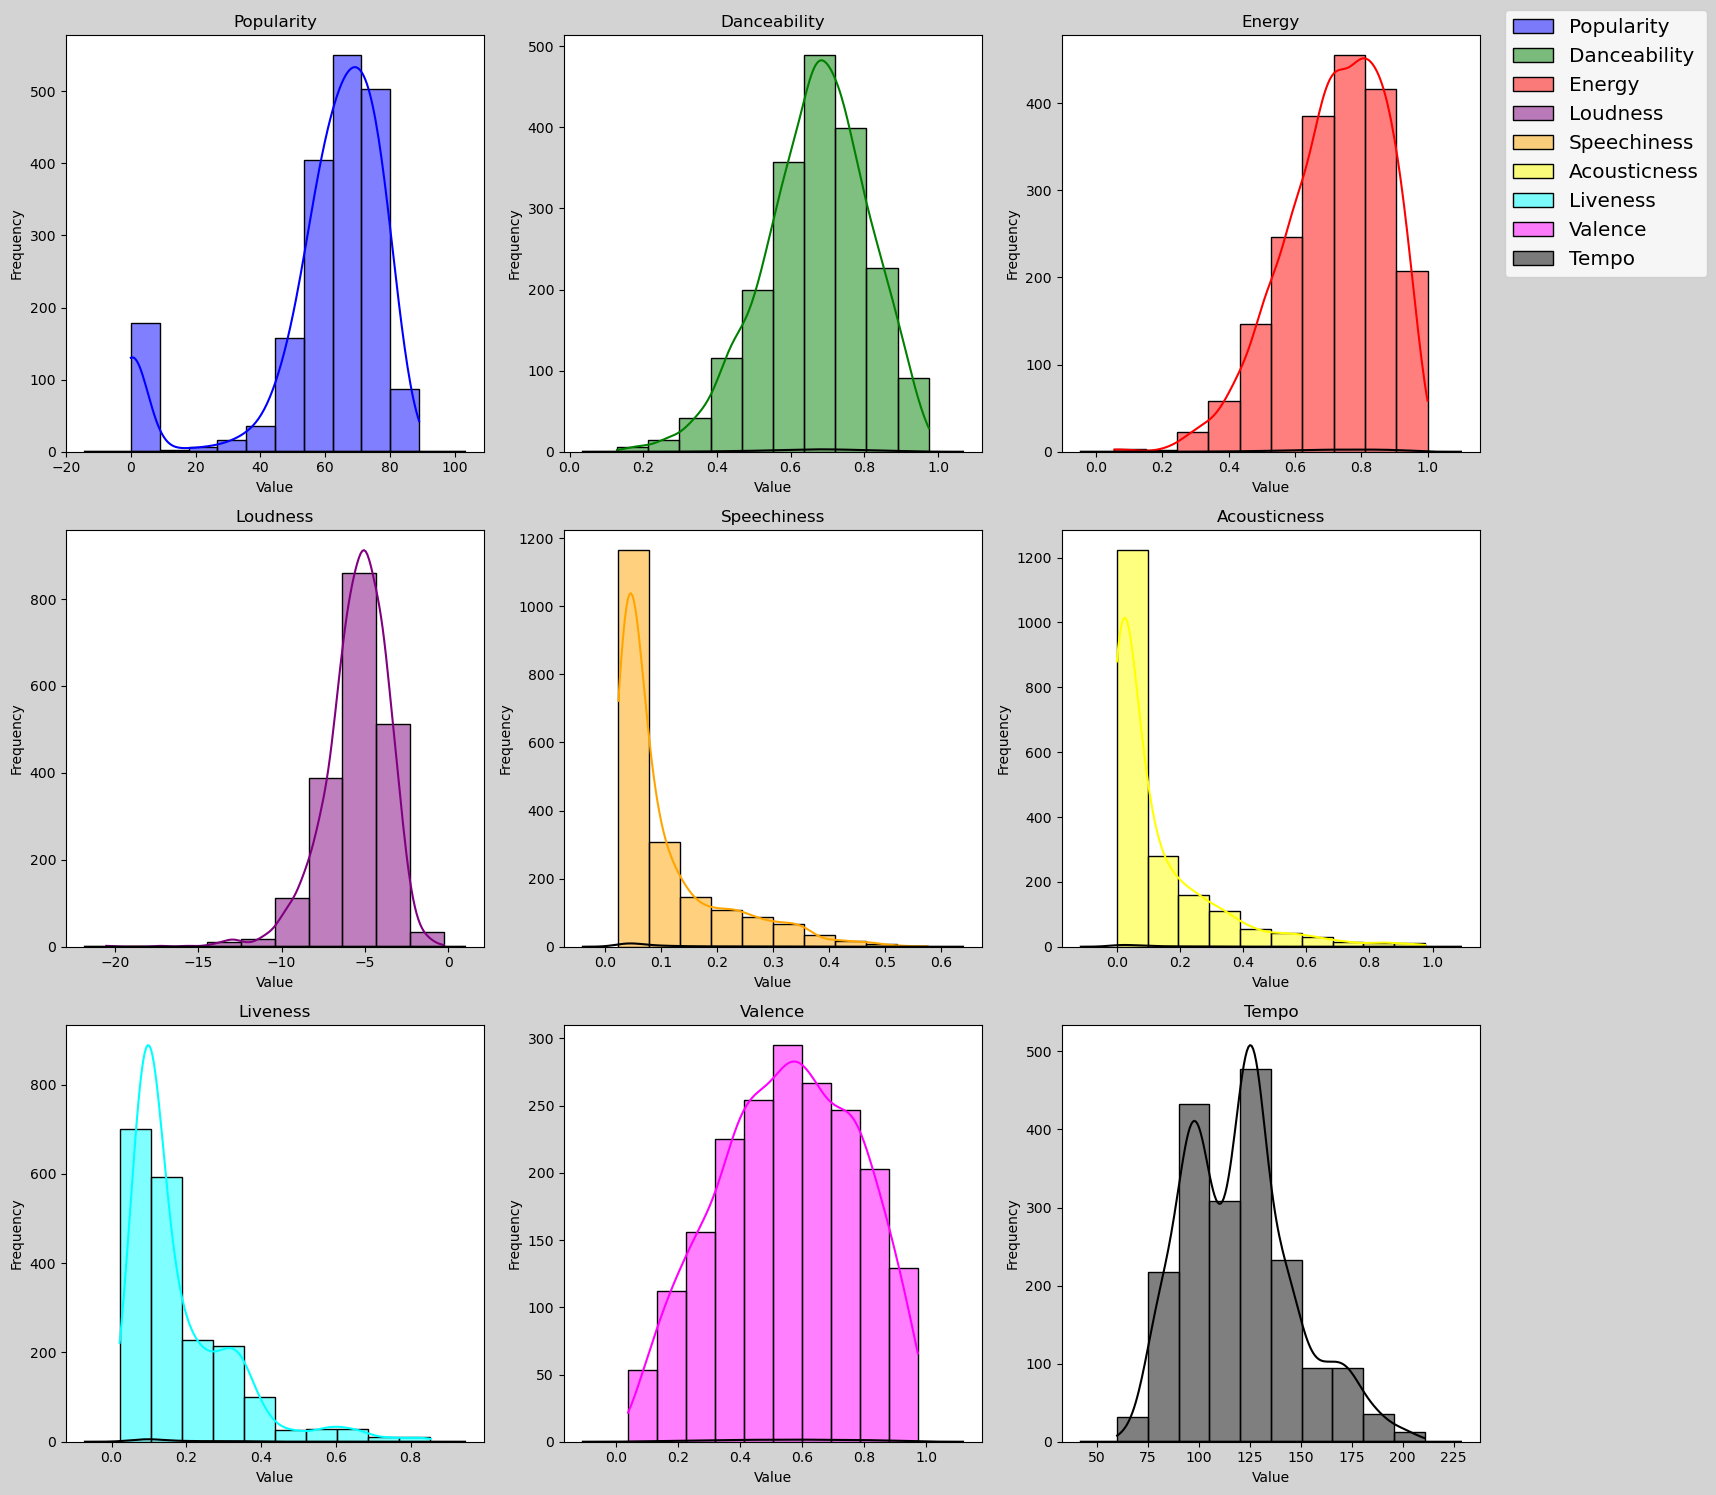

()

In [16]:
attribute_Frequency(spotify)

# SCATTER PLOT


In [60]:
def scatter_plot(spotify):
    """
    Plot the scatterplot for sorted popularity values
    
    """

    Artist_df = spotify[['artist', 'popularity']].groupby('artist').mean()
    Artist_df['total_songs'] = spotify['artist'].value_counts()  # Count total songs per artist
    Artist_df = artist_df.sort_values(by='total_songs', ascending=False).head(20)  # Select top 10 artists
    Artist_df.reset_index(inplace=True)

    plt.figure(figsize=(10, 6))
    plt.scatter(Artist_df['artist'], Artist_df['popularity'], s=Artist_df['total_songs']*5, c=Artist_df['popularity'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Popularity')
    plt.xlabel('Artist')
    plt.ylabel('Average Popularity of Top Hits')
    plt.title('Top 20 Artists vs Average Popularity of Their Top Hits')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return()

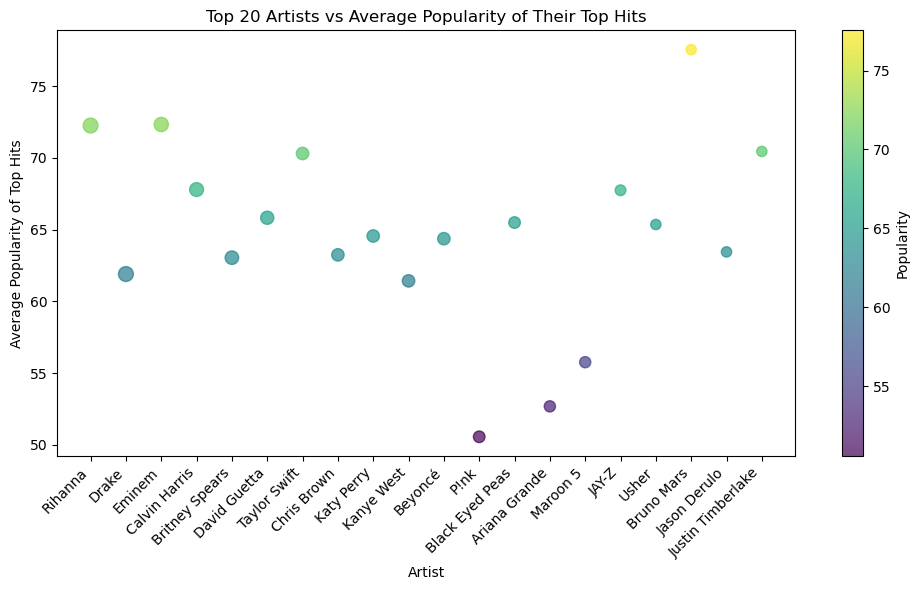

()

In [61]:
scatter_plot(spotify)

# BOX PLOT

In [25]:
def box_plot(spotify):
    """
    Creates a box plot to find how popularity changes with Genre
    
    """

    plt.figure(figsize=(8, 6))
    plt.boxplot([spotify[spotify['explicit'] == 0]['popularity'], spotify[spotify['explicit'] == 1]['popularity']], 
            labels=['Not Explicit', 'Explicit'],medianprops=dict(color='magenta'))

    plt.title('Popularity Based on Explicit Content', fontweight='bold')
    plt.xlabel('Explicit')
    plt.ylabel('Popularity')
    plt.grid(True)
    plt.show()
    return()

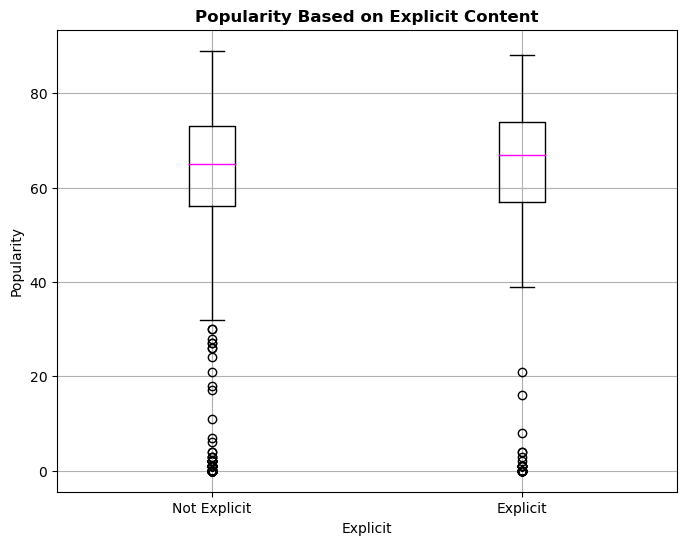

()

In [26]:
box_plot(spotify)

# BAR GRAPH

In [75]:
def bar_plot(spotify):
    """
    Creating a bar graph between Popularity and Genre
    
    """
    genre_popularity = spotify.groupby('genre')['popularity'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(genre_popularity.index, genre_popularity, color='lightgreen')
    plt.xlabel('Genre')
    plt.ylabel('Popularity')
    plt.title('Popular genres based on popularity')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    return()

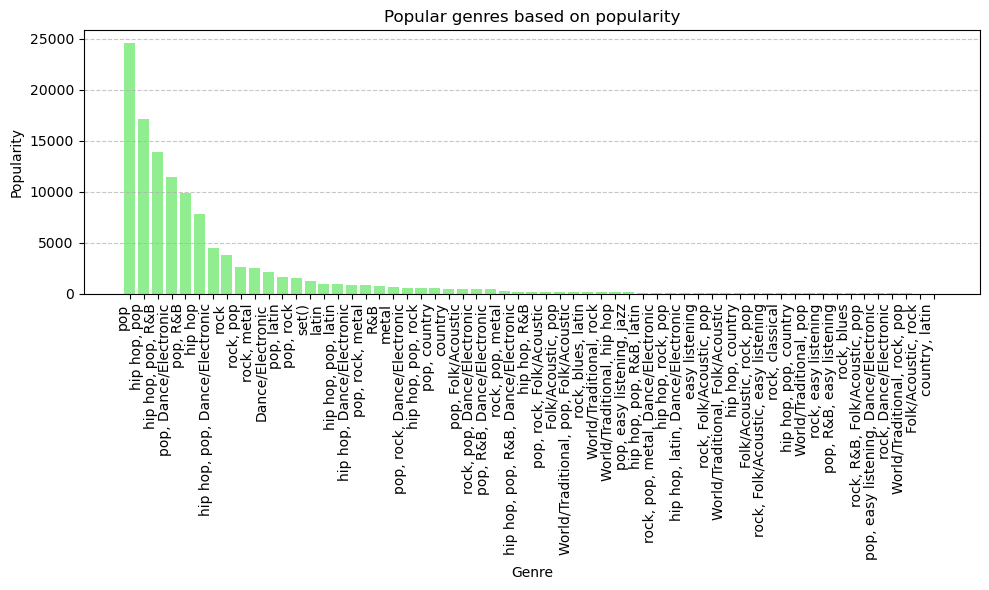

()

In [76]:
bar_plot(spotify)

# LINE CHART

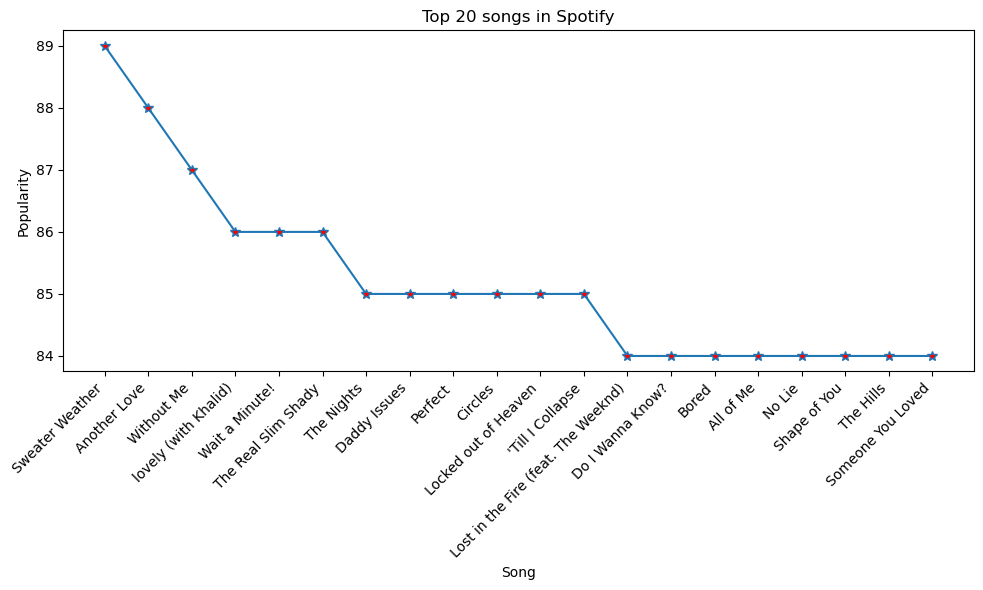

In [77]:
# Plotting TOP 20 SONGS LINE CHART
top_20 = spotify.sort_values(by='popularity', ascending=False).head(20)


plt.figure(figsize=(10, 6))
plt.plot(top_20['song'], top_20['popularity'], marker='*', markersize=7,linestyle='-',markerfacecolor='red')
plt.xlabel('Song')
plt.ylabel('Popularity')
plt.title('Top 20 songs in Spotify')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# QUANTITATIVE ANALYSIS

In [78]:
# To find the mean value of each attributes
column_means = {}


for column in spotify.columns:
       if pd.api.types.is_numeric_dtype(spotify[column]):
        mean_value = spotify[column].mean()
        column_means[column] = mean_value
        
mean_df = pd.DataFrame(column_means.items(), columns=['Column', 'Mean'])
mean_df


,Column,Mean
0,duration_ms,228594.973725
1,explicit,0.276662
2,year,2009.520350
3,popularity,59.633179
4,danceability,0.667814
5,energy,0.721549
6,key,5.369397
7,loudness,-5.514082
8,mode,0.553323
9,speechiness,0.103783


In [79]:
# To find the median value of each attributes
column_medians = {}


for column in spotify.columns:
       if pd.api.types.is_numeric_dtype(spotify[column]):
        median_value = spotify[column].median()
        column_medians[column] = median_value
        
median_df = pd.DataFrame(column_medians.items(), columns=['Column', 'Median'])
median_df


,Column,Median
0,duration_ms,223186.0000
1,explicit,0.0000
2,year,2010.0000
3,popularity,65.0000
4,danceability,0.6760
5,energy,0.7390
6,key,6.0000
7,loudness,-5.2850
8,mode,1.0000
9,speechiness,0.0610


In [80]:
# To find the mode value of each attributes
column_mode = {}


for column in spotify.columns:
    if pd.api.types.is_numeric_dtype(spotify[column]):
        mode_value = spotify[column].mode()
        if not mode_value.empty: 
            mode_value = mode_value.iloc[0]  
        else:
            mode_value = None  
        column_mode[column] = mode_value
        
mode_df = pd.DataFrame(column_mode.items(), columns=['Column', 'Mode'])
mode_df


,Column,Mode
0,duration_ms,185586
1,explicit,False
2,year,2012
3,popularity,0
4,danceability,0.687
5,energy,0.783
6,key,1
7,loudness,-6.366
8,mode,1
9,speechiness,0.029


In [81]:
# To find the variances of each attributes
column_variances = {}


for column in spotify.columns:
       if pd.api.types.is_numeric_dtype(spotify[column]):
        variance_value = spotify[column].var()
        column_variances[column] = variance_value
        
variance_df = pd.DataFrame(column_variances.items(), columns=['Column', 'variance'])
variance_df

,Column,variance
0,duration_ms,1.540546e+09
1,explicit,2.002231e-01
2,year,3.452188e+01
3,popularity,4.622953e+02
4,danceability,1.977069e-02
5,energy,2.336973e-02
6,key,1.307018e+01
7,loudness,3.759529e+00
8,mode,2.472841e-01
9,speechiness,9.244407e-03


In [82]:
# To find the standard deviation of each attributes
column_deviation = {}


for column in spotify.columns:
       if pd.api.types.is_numeric_dtype(spotify[column]):
        std_value = spotify[column].std()
        column_deviation[column] = std_value
        
std_df = pd.DataFrame(column_deviation.items(), columns=['Column', 'Standard deviation'])
std_df

,Column,Standard deviation
0,duration_ms,39249.796103
1,explicit,0.447463
2,year,5.875532
3,popularity,21.501053
4,danceability,0.140608
5,energy,0.152872
6,key,3.615270
7,loudness,1.938950
8,mode,0.497277
9,speechiness,0.096148


In [83]:
# basic statistical functions
spotify.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [84]:
#skewness of attributes
column_skewness = {}


for column in spotify.columns:
       if pd.api.types.is_numeric_dtype(spotify[column]):
        skewness = skew(spotify[column])
        column_skewness[column] = skewness

skewness_df = pd.DataFrame(column_skewness.items(), columns=['Column', 'Skewness'])
skewness_df

,Column,Skewness
0,duration_ms,1.022342
1,explicit,0.998501
2,year,-0.051289
3,popularity,-1.800223
4,danceability,-0.428200
5,energy,-0.641724
6,key,-0.008842
7,loudness,-1.208279
8,mode,-0.214515
9,speechiness,1.769935


In [85]:
#Kurtosis values of attributes
column_kurt = {}

for column in spotify.columns:
    if pd.api.types.is_numeric_dtype(spotify[column]):
        kurt_value = kurtosis(spotify[column])  
        column_kurt[column] = kurt_value
        
kurt_df = pd.DataFrame(column_kurt.items(), columns=['Column', 'Kurtosis'])
kurt_df


,Column,Kurtosis
0,duration_ms,3.352522
1,explicit,-1.002996
2,year,-1.197771
3,popularity,2.529434
4,danceability,0.125628
5,energy,0.187740
6,key,-1.297920
7,loudness,4.011835
8,mode,-1.953983
9,speechiness,2.658413


In [86]:
#Inter quartile range of attributes
numeric_spotify = spotify.select_dtypes(include=['number'])
iqr = numeric_spotify.quantile(0.75) - numeric_spotify.quantile(0.25)
iqr

duration_ms         44440.000000
year                   11.000000
popularity             17.000000
danceability            0.184000
energy                  0.216000
key                     6.000000
loudness                2.322000
mode                    1.000000
speechiness             0.089300
acousticness            0.162500
instrumentalness        0.000069
liveness                0.153600
valence                 0.341000
tempo                  35.213000
dtype: float64

# BAR GRAPH OF ATTRIBUTE MEAN VALUES

In [87]:
def attribute_means(spotify):
    """
    Plot means of different musical(numerical) attributes of dataframe 
    """
    df = spotify.drop(['year','artist','song','genre','duration_ms','explicit'], axis=1)
    df_mean = pd.DataFrame(df.mean().sort_values(ascending=False).reset_index())
    df_mean.rename(columns={ df_mean.columns[1]: "value" }, inplace = True)

    plt.figure(figsize=(20,10))
    plt.title('Musical attributes mean values', fontsize=25)
    g = sns.barplot(x='index', y='value', data=df_mean, palette='Reds_r')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=16)
    plt.xlabel('')
    plt.xticks(fontsize=12)
    plt.ylabel('Value', fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    return()

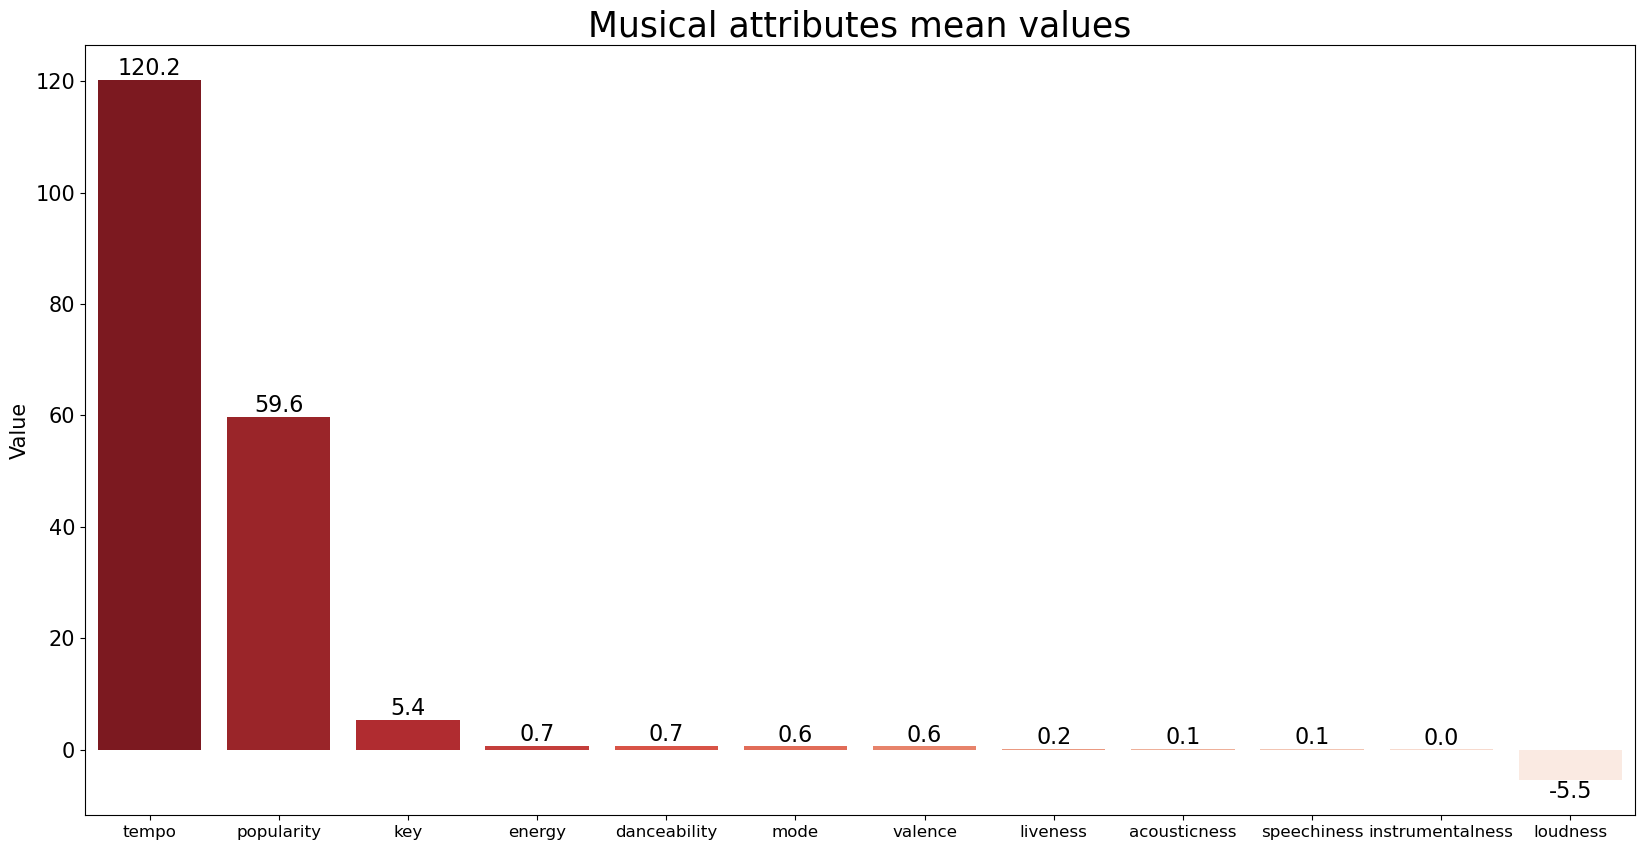

()

In [88]:
attribute_means(spotify)

# CORRELATION

In [83]:
#to find pearson correlation co-efficients
correlation_P = spotify.corr('pearson')
correlation_P

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762
year,-0.318835,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798
popularity,0.048140,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057
danceability,-0.060083,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074
energy,-0.082982,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305
key,-0.001353,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852
loudness,-0.086226,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655
mode,-0.004095,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445
speechiness,0.062538,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192
acousticness,0.009960,0.040698,0.022501,-0.062374,-0.447056,0.000719,-0.312079,0.009210,0.002926,1.000000,-0.003220,-0.107766,-0.126129,-0.105533


In [84]:
def correlation_matrix(spotify,method):
    """
    Compute and visualize the correlation matrix for the Spotify dataset.
    Creating a function that converts the input DataFrame to numeric format to ensure that
    only numerical columns are considered for computing the correlation matrix.
    
    """
     
    plt.figure(dpi=144)
    plt.figure(figsize=(20, 20))
    plt.title('Correlation Matrix', fontsize=25)
    sns.heatmap(spotify.corr(method=method), cmap='RdBu', annot=True)
    plt.title(method.capitalize(),size=20)
    plt.show()

    return



<Figure size 921.6x691.2 with 0 Axes>

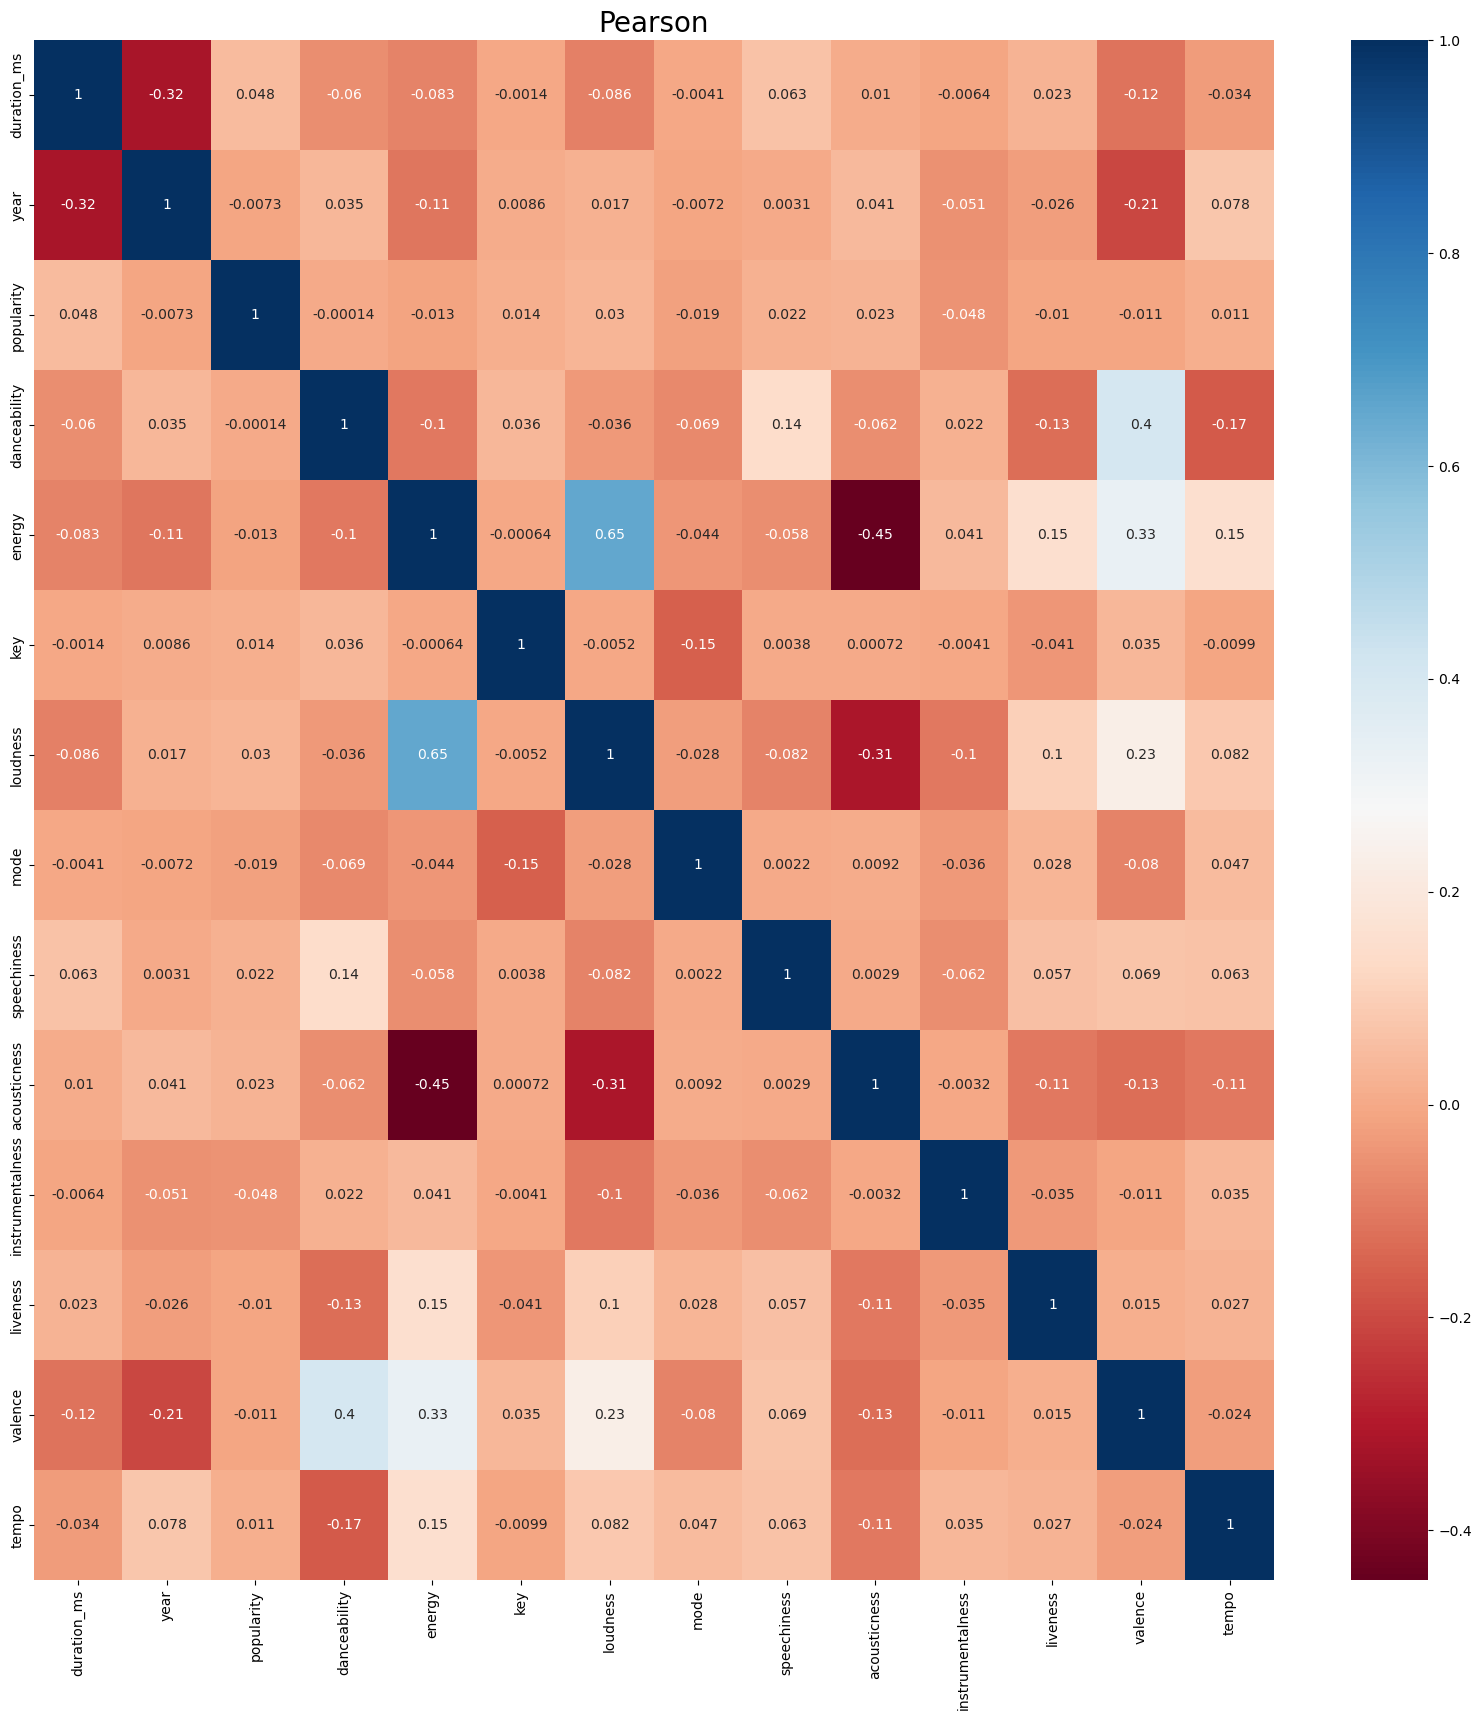

In [85]:
correlation_matrix(spotify,'pearson')

<Figure size 921.6x691.2 with 0 Axes>

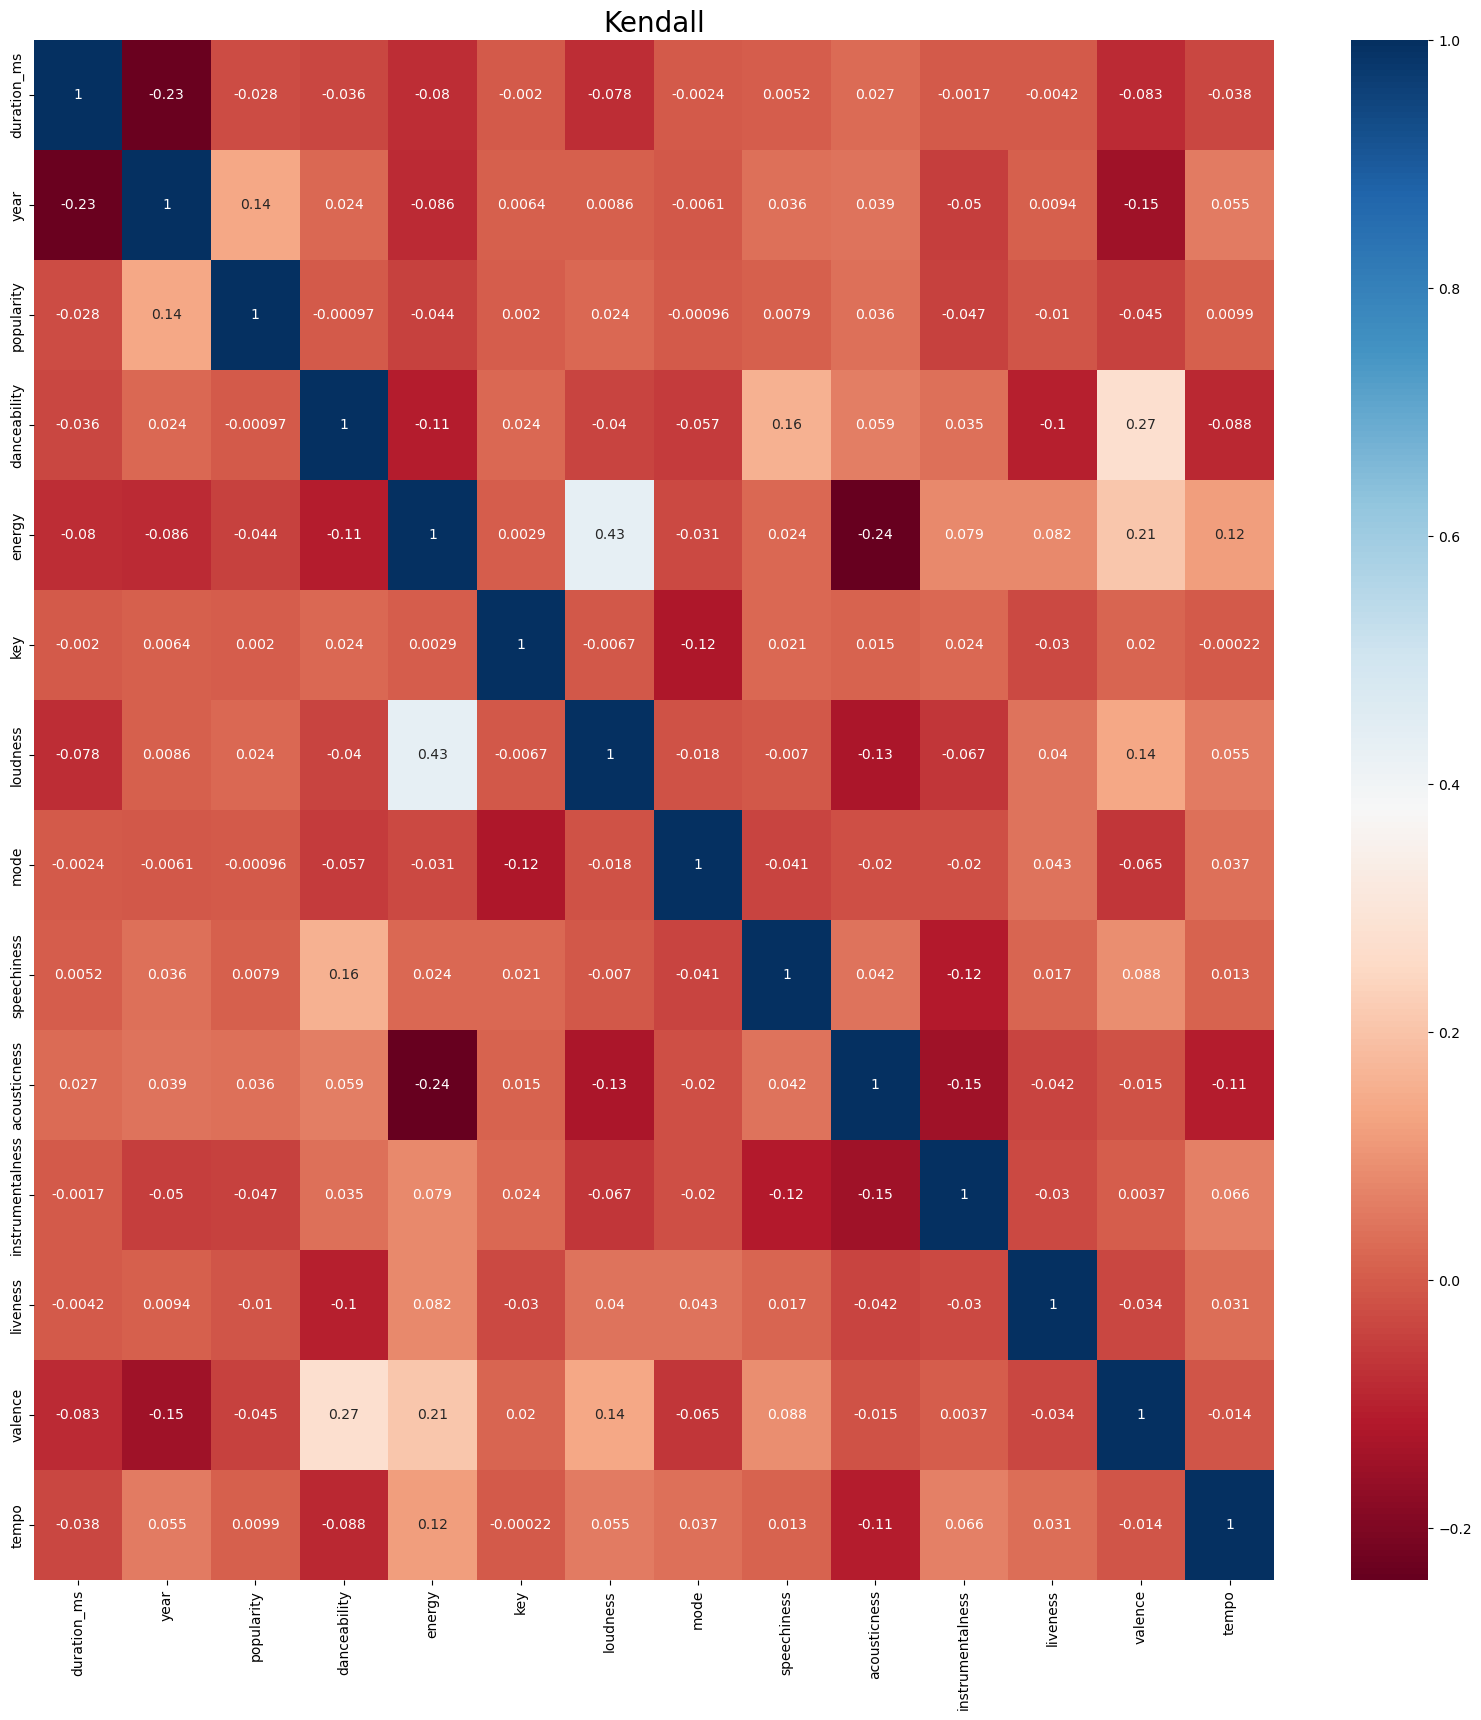

In [86]:
# For Kendall Corelation co-efficient
correlation_matrix(spotify,'kendall')